In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))

print("\n")
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print("\n")
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

11490434/11490434 [==============================] - 1s 0us/step
Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)


Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


In [2]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [5]:
batch_size = 128
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 8s 9ms/step - loss: 2.2416 - accuracy: 0.2924 - val_loss: 2.1467 - val_accuracy: 0.5595
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 1.8436 - accuracy: 0.6565 - val_loss: 1.3046 - val_accuracy: 0.7437
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.8584 - accuracy: 0.8054 - val_loss: 0.5604 - val_accuracy: 0.8608
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4935 - accuracy: 0.8670 - val_loss: 0.4121 - val_accuracy: 0.8891
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.4006 - accuracy: 0.8878 - val_loss: 0.3575 - val_accuracy: 0.8994
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.3585 - accuracy: 0.8977 - val_loss: 0.3285 - val_accuracy: 0.9092
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3327 - accuracy: 0.9038 - val_loss: 0.3065 - val_accuracy: 0.9122
Epoch

In [7]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'conv2d': <keras.src.layers.convolutional.conv2d.Conv2D at 0x79a91c42e800>,
 'conv2d_1': <keras.src.layers.convolutional.conv2d.Conv2D at 0x79a884f1f4f0>,
 'max_pooling2d': <keras.src.layers.pooling.max_pooling2d.MaxPooling2D at 0x79a884f1f9a0>,
 'flatten': <keras.src.layers.reshaping.flatten.Flatten at 0x79a884f1df00>,
 'dense': <keras.src.layers.core.dense.Dense at 0x79a88466d300>,
 'dense_1': <keras.src.layers.core.dense.Dense at 0x79a88466d3f0>}

In [13]:
for layer in model.layers:
  if "conv" not in layer.name:
    continue

  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 64)


In [14]:
filters, biases = model.layers[0].get_weights()

In [15]:
print(filters.shape)
filters

(3, 3, 1, 32)


array([[[[ 4.28460799e-02, -1.39031693e-01,  2.03667991e-02,
          -1.17574543e-01,  4.40691113e-02, -8.19744840e-02,
          -8.76596645e-02,  2.14400422e-03, -5.46891475e-03,
          -1.09648339e-01,  7.00644702e-02, -7.90272057e-02,
          -3.72824110e-02, -2.01286878e-02, -4.97464463e-02,
           9.63705406e-02,  4.91332747e-02, -1.16357893e-01,
           1.72466412e-02,  9.04326588e-02, -1.10625699e-02,
          -1.19538754e-01,  1.53522417e-01, -6.09645806e-02,
           3.21772601e-03, -1.82534214e-02,  1.19431764e-01,
          -1.00002494e-02,  1.28805667e-01,  1.48377735e-02,
           1.19673409e-01,  4.85211567e-05]],

        [[ 2.79123902e-01, -9.21255425e-02, -8.03042725e-02,
          -7.24599138e-02,  2.81591862e-01, -1.21561296e-01,
           1.27709776e-01, -7.93654993e-02, -3.55903320e-02,
           4.25428376e-02, -6.92233723e-03, -6.26669899e-02,
           7.30106905e-02,  2.80613378e-02, -2.51450893e-02,
          -1.09226823e-01,  6.00968348

In [16]:
print(biases.shape)
biases

(32,)


array([ 1.6495915e-02,  2.8787574e-02, -9.5693944e-03,  4.5527045e-02,
        2.6439087e-02,  1.1042616e-04,  2.0094856e-03,  1.9337004e-02,
       -1.0848356e-03,  2.1654814e-02,  5.1215366e-03,  5.5540428e-02,
        2.1088759e-03, -5.9212525e-03,  1.4798936e-05,  3.1780038e-02,
        1.8474501e-02,  3.6322564e-02,  3.4702104e-02,  5.5377214e-04,
       -2.0852156e-03,  2.1578761e-02,  3.7525730e-05,  3.1888124e-02,
        7.8365663e-03,  1.0973657e-02,  2.0430502e-05,  1.0493574e-02,
        3.7036654e-05,  1.2877143e-02, -1.2068829e-02, -5.3141122e-03],
      dtype=float32)

In [18]:
f_min, f_max = filters.min(), filters.max()
print(f"Before Normalisation, Min = {f_min} and Max = {f_max}")

filters = (filters - f_min)/(f_max - f_min)
print(f"Before Normalisation, Min = {filters.min()} and Max = {filters.max()}")

Before Normalisation, Min = -0.14012345671653748 and Max = 0.3451792895793915
Before Normalisation, Min = 0.0 and Max = 1.0


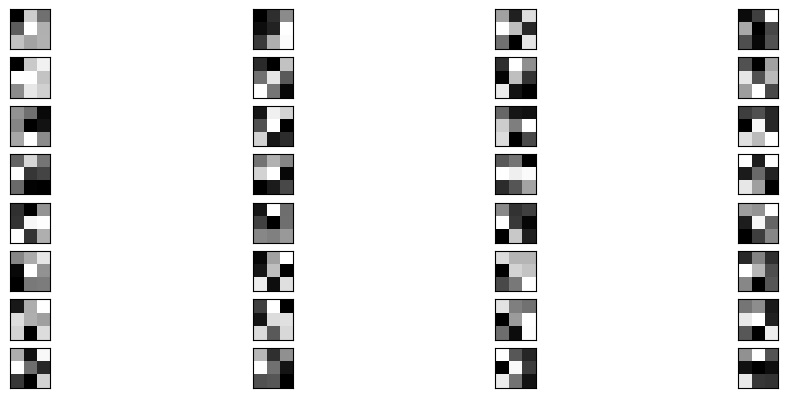

In [19]:
import matplotlib.pyplot as plt
import numpy as np

n_filters, ix = 32, 1
plt.figure(figsize=(12, 20))

for i in range(n_filters):
  f = filters[:, :, :, i]

  ax = plt.subplot(n_filters, 4, ix)
  ax.set_xticks([])
  ax.set_yticks([])

  plt.imshow(np.squeeze(f, axis=2), cmap="gray")
  ix += 1

plt.show()

In [20]:
from tensorflow.keras.models import Model

layer_outputs = [layer.output for layer in model.layers[:2]]

activation_model = Model(inputs=model.input, outputs=layer_outputs)

(-0.5, 27.5, 27.5, -0.5)

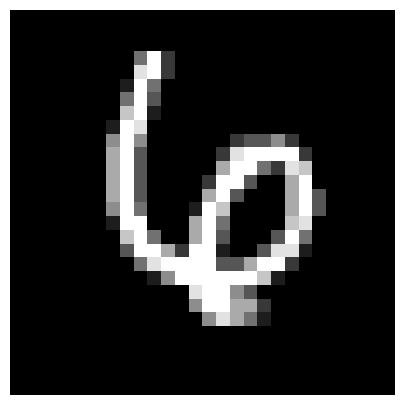

In [21]:
img_tensor = x_test[22].reshape(1, 28, 28, 1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0], cmap="gray")
plt.axis("off")

In [24]:
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 25ms/step


In [25]:
print("Number of layer activations: " + str(len(activations)))

Number of layer activations: 2


In [26]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


In [27]:
second_layer_activation = activations[1]
print(second_layer_activation.shape)

(1, 24, 24, 64)


In [28]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

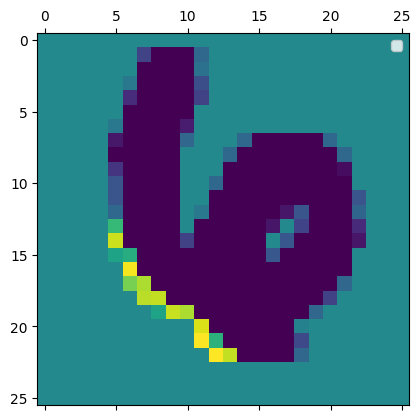

In [29]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.legend()

In [34]:
def display_activation(activation, col_size, row_size, act_index):
  activation = activation[act_index]
  activation_index = 0
  fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5, col_size*1.5))
  for row in range(0, row_size):
    for col in range(0, col_size):
      ax[row][col].imshow(activation[0, :, :, activation_index], cmap="viridis")
      activation_index += 1

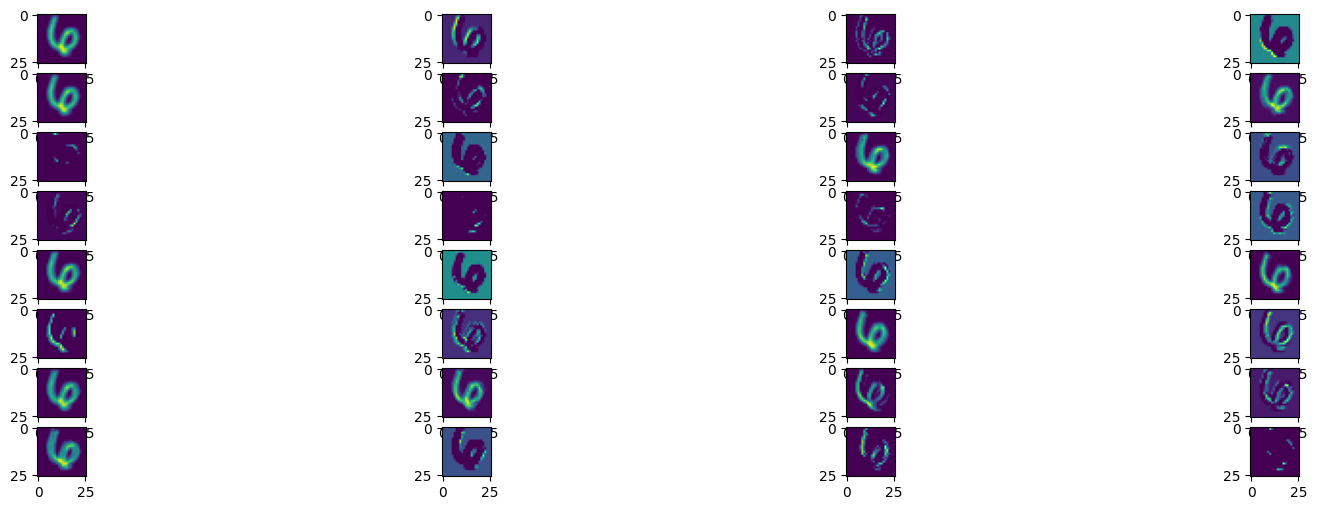

In [35]:
display_activation(activations, 4, 8, 0)